In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os

NameError: name 'numpy' is not defined

Text(0.5, 1.0, 'Monophonic')

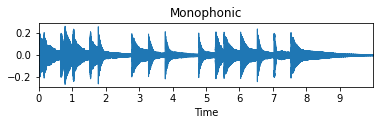

In [6]:
y, sr = librosa.load('music_data/test.wav', duration=10)
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

In [8]:
y

array([ 0.        ,  0.        ,  0.        , ..., -0.00161913,
       -0.0002889 ,  0.00138214], dtype=float32)

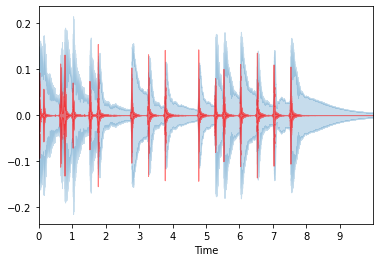

In [7]:
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)

In [51]:
y, sr = librosa.load('music_data/test.wav',44100)

In [43]:
44100/1024

(1025, 690)

In [55]:
each_feq = 44100/1024
# 最小的那个阈值
yu1 = 246 // each_feq
# 最大的那个阈值
yu2 = 2489 // each_feq
print(each_feq,yu1,yu2)

43.06640625 5.0 57.0


In [57]:
for i in range(len(D)):
    if i < yu1 or i > yu2:
        D[i][D[i]< 1000] = 0    

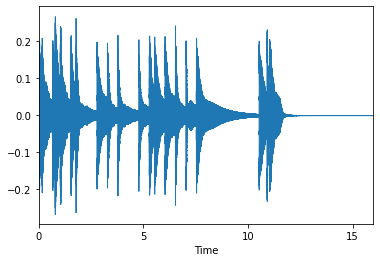

In [21]:
librosa.display.waveplot(y_hat, sr=sr)

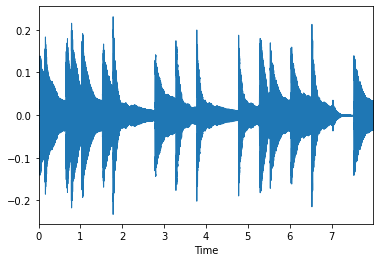

In [58]:
y_out = librosa.istft(D, length=n)
librosa.display.waveplot(y_out, sr=sr)

In [104]:
index = np.arange(0, len(y_out), 1000)

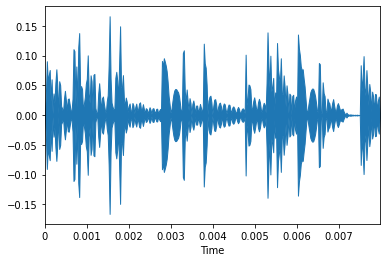

In [105]:
y_out2 = y_out[index]
librosa.display.waveplot(y_out2, sr=sr)

In [99]:
librosa.output.write_wav('music_data/output.wav',y_out2,44100)

In [106]:
y_out2.shape

(353,)

In [60]:
y.shape

(705600,)

In [110]:
y_out.shape

(352800,)

In [ ]:
y, sr = librosa.load('music_data/output.wav',44100)

In [61]:
librosa.output.write_wav('music_data/output.wav',y_out,44100)

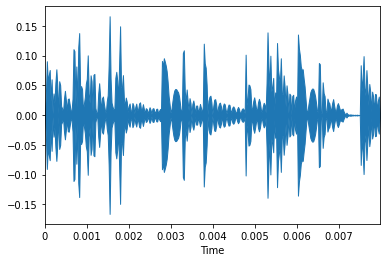

In [107]:
y, sr = librosa.load('music_data/output.wav',44100)
librosa.display.waveplot(y, sr=sr)

In [62]:
librosa.output.write_wav('music_data/output2.wav',y,44100)

In [127]:
import os
def writesmall(dirpath = "music_data/源数据/"):
    for file in os.listdir(dirpath):
        # 读取数据文件
        y, sr = librosa.load(dirpath+file,44100)
        # 得到短时傅里叶
        D = librosa.stft(y)
        # 进行处理
        for i in range(len(D)):
            if i < yu1 or i > yu2:
                D[i][D[i]< 1000] = 0  
        # 再转回来
        n = len(y)
        y_out = librosa.istft(D, length=n)
        # 这里进行采样
        y_out2 = y_out[index]
        
        #librosa.display.waveplot(y_out, sr=sr)
        # 保存
        #librosa.output.write_wav('music_data/输出数据/'+file,y_out,44100)
        librosa.output.write_wav('music_data/输出数据/'+file,y_out2,44100)
    

In [128]:
writesmall()

In [67]:
D2 = []
for each_D in D:
    if each_D.max() != 0:
        D2.append(each_D)
D2 = np.array(D2)

In [68]:
D2.shape

(53, 1379)

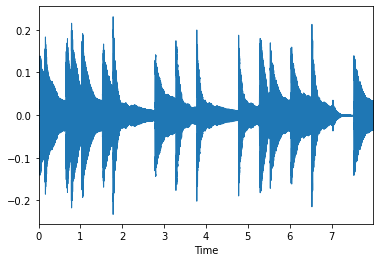

In [69]:
y_out2 = librosa.istft(D2)
librosa.display.waveplot(y_out, sr=sr)

In [75]:
os.listdir('music_data')

['output.wav', 'output2.wav', 'test.wav']